# `Bulldozers Price Prediction Model`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('E:/Data Science/Data/bluebook-for-bulldozers/TrainAndValid.csv', low_memory=False, parse_dates= ['saledate'])

In [4]:
df.shape

(412698, 53)

In [6]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# `Missing Value Analysis`

In [8]:
df.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [9]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

## `Distribution of Price Variable over the Time`

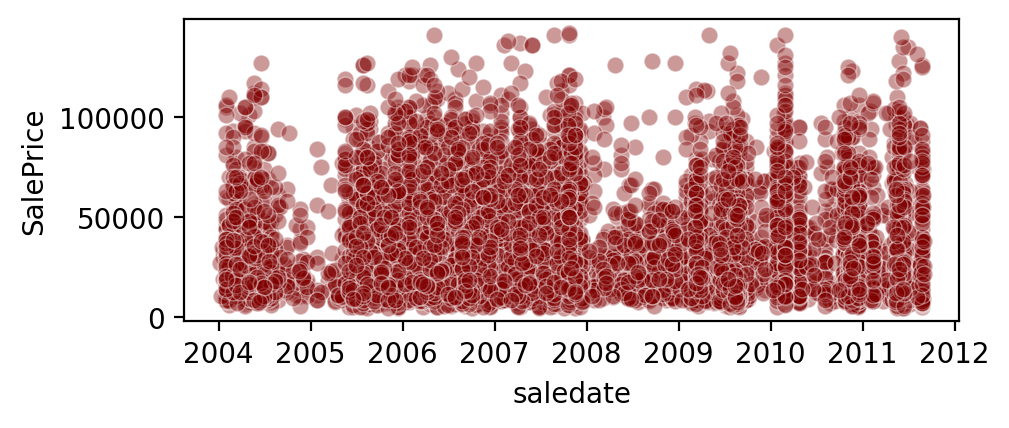

In [32]:
plt.figure(figsize = (5,2), dpi = 200)
sns.scatterplot(x = df.saledate[:10000], y =df.SalePrice[:10000], color = 'Maroon' , alpha = 0.4);

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

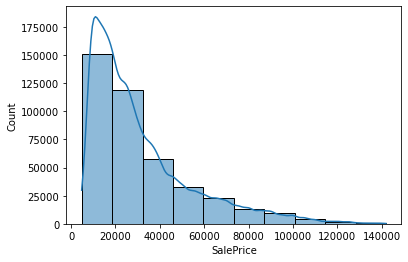

In [33]:
sns.histplot(df.SalePrice, bins = 10, kde = True)

<AxesSubplot:ylabel='Frequency'>

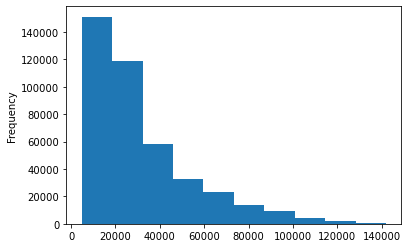

In [34]:
df.SalePrice.plot.hist()

## Resetting the data by sorted date values

* We also reset the index


In [35]:
df.sort_values(by = ['saledate'], inplace = True, ascending = True)

In [38]:
df.head(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [41]:
df.reset_index(drop = True, inplace = True)

In [42]:
df.head(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [43]:
tmp = df.copy()

* Let's look at various columns of the dataset

In [45]:
tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


### We make use of the datelime library
* Let's see if the various date objects can have any effect on the price variable

In [46]:
import datetime as dt

In [50]:
df['saleyear'] = df.saledate.dt.year
df['salemonth'] = df.saledate.dt.month
df['saleday'] = df.saledate.dt.day
df['saledayweek'] = df.saledate.dt.dayofweek
df['saledayyear'] = df.saledate.dt.dayofyear
    

In [52]:
df.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


## List comprehension 
* To store numeric and object data variables seperately

In [54]:
num_var= [var for var in df.columns if df[var].dtypes != 'O']
df.dtypes

SalesID                              int64
SalePrice                          float64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type   

In [55]:
cat_var= [var for var in df.columns if df[var].dtypes == 'O']
df[cat_var]

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,NaN,TD20,TD20,NaN,NaN,NaN,Medium,"Track Type Tractor, Dozer - 105.0 to 130.0 Hor...",Texas,TTT,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
1,NaN,A66,A66,NaN,NaN,NaN,NaN,Wheel Loader - 120.0 to 135.0 Horsepower,Florida,WL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,NaN,D7G,D7,G,NaN,NaN,Large,"Track Type Tractor, Dozer - 190.0 to 260.0 Hor...",Florida,TTT,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
3,NaN,A62,A62,NaN,NaN,NaN,NaN,Wheel Loader - Unidentified,Florida,WL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
4,NaN,D3B,D3,B,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,NaN,D38E,D38,E,NaN,NaN,NaN,"Track Type Tractor, Dozer - 75.0 to 85.0 Horse...",California,TTT,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
412694,NaN,2064,2064,NaN,NaN,NaN,NaN,Skid Steer Loader - 1751.0 to 2201.0 Lb Operat...,California,SSL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412695,NaN,337G,337,G,NaN,NaN,Mini,"Hydraulic Excavator, Track - 5.0 to 6.0 Metric...",California,TEX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412696,NaN,12G,12,G,NaN,NaN,NaN,Motorgrader - 130.0 to 145.0 Horsepower,California,MG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
len(num_var), len(cat_var) 

(14, 44)

In [59]:
df.shape

(412698, 58)

## Converting object datatypes to numeric categories
* `Convert 'object' datatype to category`

In [61]:
df.items()

<generator object DataFrame.items at 0x000001F2F8A92900>

In [68]:
for col, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(col)
        

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [82]:
for col, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[col] = content.astype('category').cat.as_ordered()

In [83]:
df['Track_Type'].cat.categories

Index(['Rubber', 'Steel'], dtype='object')

In [84]:
df['Track_Type'].cat.codes

0        -1
1        -1
2        -1
3        -1
4        -1
         ..
412693   -1
412694   -1
412695   -1
412696   -1
412697   -1
Length: 412698, dtype: int8

In [85]:
df.dtypes

SalesID                              int64
SalePrice                          float64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                         category
saledate                    datetime64[ns]
fiModelDesc                       category
fiBaseModel                       category
fiSecondaryDesc                   category
fiModelSeries                     category
fiModelDescriptor                 category
ProductSize                       category
fiProductClassDesc                category
state                             category
ProductGroup                      category
ProductGroupDesc                  category
Drive_System                      category
Enclosure                         category
Forks                             category
Pad_Type   

In [90]:
df.isnull().sum()/len(df)*100

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
saledate                     0.000000
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission

## `Fill the missing values` with median for all numeric variables
* We also create seperate variables to keep a track of which variables were manually filled with median

In [95]:
for col, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        #prints all numeric columns
        #print(cols)
        
        #prints mumeric cols with missing data
        if pd.isnull(content).sum():
            
            #creating a column to keep count of which records were missing
            df[col + '_missng'] = pd.isnull(content)
            
            #replacing null with median (since median is robust to outliers)
            df[col] = content.fillna(content.median())

In [96]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls', 'saleyear',
       'salemonth', 'saleday', 'saledayweek', 'saledayyear',
    

In [98]:
df['MachineHoursCurrentMeter_missng'].value_counts()

True     265194
False    147504
Name: MachineHoursCurrentMeter_missng, dtype: int64

* The below code validates if still any missing values exists

In [99]:
#check again if any missing values :
for col, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        #prints all numeric columns
        #print(cols)
        
        #prints mumeric cols with missing data
        if pd.isnull(content).sum():
            print(cols)
            

In [108]:
#lets print categoric variables with missing data
for col, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
    
    #prints all non-numeric columns
        
        
    #prints non-numeric cols with missing data
        if pd.isnull(content).sum():
            print(col)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [109]:
for col,content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        #creating a column to keep count of which records were missing
        df[col+'_missing'] = pd.isnull(content)
        
        #converting categories to numbers and adding 1 (since null values are assigned -1)
        df[col] = pd.Categorical(content).codes+1
        

In [102]:
 pd.Categorical(df['UsageBand']).codes , pd.Categorical(df['UsageBand']).codes+1

(array([-1, -1, -1, ..., -1, -1, -1], dtype=int8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int8))

In [110]:
for col, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
    
    #prints all non-numeric columns
        
        
    #prints non-numeric cols with missing data
        if pd.isnull(content).sum():
            print(col)

In [111]:
pd.Categorical(df['UsageBand']).codes

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 105 entries, SalesID to Steering_Controls_missing
dtypes: bool(47), float64(3), int16(5), int64(10), int8(40)
memory usage: 79.1 MB


In [113]:
df.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_missing,False,True,False,True,False
Blade_Type_missing,False,True,False,True,False
Travel_Controls_missing,False,True,False,True,False
Differential_Type_missing,True,False,True,False,True


### We split the data into training and validation sets

In [122]:
df['saleyear'].value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleyear, dtype: int64

In [123]:
df_tr = df[df['saleyear'] !=2012]
df_val = df[df['saleyear'] ==2012]

len(df_tr) , len(df_val)

(401125, 11573)

In [124]:
xtr, ytr = df_tr.drop('SalePrice', axis = 1) , df_tr['SalePrice']
xval, yval = df_val.drop('SalePrice', axis = 1) , df_val['SalePrice']

In [126]:
xtr.shape, ytr.shape, xval.shape, yval.shape

((401125, 104), (401125,), (11573, 104), (11573,))

In [128]:
for col, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        #prints all numeric columns
        print(col)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
UsageBand
saledate
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls
saleyear
salemonth
saleday
saledayweek
saledayyear
auctioneerID_missng
MachineHoursCurrentMeter_missng
UsageBand_missing
saledate_missing
fiModelDesc_missing
fiBaseModel_missing
fiSecondaryDesc_missing
fiModelSeries_missing
fiModelDescriptor_missing
ProductSize_missing
fiProductClassDesc_missing
state_missing
ProductGroup_mis

## Let's begin Machine Learning

In [138]:
from sklearn.metrics import mean_squared_log_error as MSLE, mean_absolute_error as MAE, r2_score

### Here we define our custom scores funtion for evaluating our model

In [132]:
def RMSLE(ytest, ypred):
    
    return np.sqrt(MSLE(ytest, ypred))

def scores(model):
    ytr_pred = model.predict(xtr)
    yval_pred = model.predict(xval)
    
    scores = {'Training MAE' : MAE(ytr, ytr_pred),
              'Val MAE' : MAE(yval, yval_pred),
              'Training RMSLE' : RMSLE(ytr, ytr_pred),
              'Val RMSLE' : RMSLE(yval, yval_pred),
              'Training R-squared' : r2_score(ytr, ytr_pred),
              'Val R-squared' : r2_score(yval, yval_pred)}
    return scores

## Using a Random Forest Regressor

* We use sampling to reduce the time to fit the model as well as for Hyper-parameter tuning

In [133]:
from sklearn.ensemble import RandomForestRegressor

RFmodel = RandomForestRegressor(n_jobs = -1, random_state= 42, max_samples= 10000)

In [136]:
%%time

RFmodel.fit(xtr,ytr)

Wall time: 22.9 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [139]:
scores(RFmodel)

{'Training MAE': 5466.239305129321,
 'Val MAE': 7260.289019268987,
 'Training RMSLE': 0.2551666876405142,
 'Val RMSLE': 0.29887271623967787,
 'Training R-squared': 0.8642843539479744,
 'Val R-squared': 0.8304445443415891}

In [140]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## Hyper-parameter tuning using `RandomizedSearchCV`

In [143]:
grid =  {'n_estimators' : np.arange(100, 500, 100),
        'max_depth' : [None, 5, 10],
        'min_samples_split' : np.arange(2,20,2),
        'max_features' : ['sqrt', 'auto'],
        'max_samples' : [10000]}

In [144]:
%%time

rs_rfmodel = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1, random_state= 42),
                                param_distributions=grid,
                                n_iter=5,
                                cv = 5, 
                                verbose = True)

rs_rfmodel.fit(xtr,ytr)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 25.4min finished


Wall time: 26min 38s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 5, 10],
                                        'max_features': ['sqrt', 'auto'],
                                        'max_samples': [10000],
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([100, 200, 300, 400])},
                   verbose=True)

In [145]:
rs_rfmodel.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [146]:
scores(rs_rfmodel)

{'Training MAE': 5437.364367017762,
 'Val MAE': 7189.58528039402,
 'Training RMSLE': 0.25414258411470825,
 'Val RMSLE': 0.29750368155251544,
 'Training R-squared': 0.8658210714023488,
 'Val R-squared': 0.8344063693213877}

In [5]:
final_model = RandomForestRegressor(n_jobs= -1, random_state=42,
                                    n_estimators = 300,
                                    min_samples_split = 2,
                                    max_features = 'auto',
                                    max_depth = None)

NameError: name 'RandomForestRegressor' is not defined

In [151]:
%%time
final_model.fit(xtr,ytr)

Wall time: 38min 53s
Parser   : 136 ms


RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

## Save the model using `pickle`

In [4]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(final_model, open(filename, 'wb'))

NameError: name 'final_model' is not defined

In [152]:
scores(final_model)

{'Training MAE': 1536.7953774675389,
 'Val MAE': 6123.656408594718,
 'Training RMSLE': 0.08224905741083957,
 'Val RMSLE': 0.25697841614121236,
 'Training R-squared': 0.9882303827772956,
 'Val R-squared': 0.8738912920137722}

## Let's implement our model on test dataset

In [154]:
dtest = pd.read_csv('E:/Data Science/Data/bluebook-for-bulldozers/Test.csv', low_memory=False, parse_dates= ['saledate'])

In [6]:
#Works just as set operator, and gives out unique values

set(xtr.columns) - set(dtest.columns)

NameError: name 'xtr' is not defined

## A custom pre-processing function to get test data in same pattern as to the training data, for fitting

In [156]:
#pre-process test data:

def Preprocess(df):
    
    #add date fields
    
    df['saleyear'] = df.saledate.dt.year
    df['salemonth'] = df.saledate.dt.month
    df['saleday'] = df.saledate.dt.day
    df['saledayweek'] = df.saledate.dt.dayofweek
    df['saledayyear'] = df.saledate.dt.dayofyear
    
    #replace missing values and add median values for numeric columns
    
    for col, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
        #prints all numeric columns
        #print(cols)
        
        #prints mumeric cols with missing data
            if pd.isnull(content).sum():
            
                #creating a column to keep count of which records were missing
                df[col + '_missng'] = pd.isnull(content)
            
                #replacing null with median (since median is robust to outliers)
                df[col] = content.fillna(content.median())
    
    #convert object columns to category and convert them to numbers
    
    for col,content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            #creating a column to keep count of which records were missing
            df[col+'_missing'] = pd.isnull(content)
        
            #converting categories to numbers and adding 1 (since null values are assigned -1)
            df[col] = pd.Categorical(content).codes+1
    
    
    return df
    

In [157]:
Preprocess(dtest)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width_missing,Stick_Length_missing,Thumb_missing,Pattern_Changer_missing,Grouser_Type_missing,Backhoe_Mounting_missing,Blade_Type_missing,Travel_Controls_missing,Differential_Type_missing,Steering_Controls_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,3,499,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,9,831,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,9,1177,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,9,287,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,9,566,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,126,713,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,126,186,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,126,325,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,126,325,...,False,False,False,False,False,True,True,True,True,True


In [158]:
set(xtr) - set(dtest)

{'auctioneerID_missng'}

In [159]:
dtest['auctioneerID_missng'] = False

In [160]:
set(xtr) - set(dtest)

set()

In [161]:
len(dtest)

12457

In [162]:
ytpred = final_model.predict(dtest)

In [163]:
df_tpreds = pd.DataFrame()
df_tpreds['SalesID'] = dtest['SalesID']
df_tpreds['pred_prices'] = ytpred

df_tpreds.head()

,SalesID,pred_prices
0,1227829,32197.833333
1,1227844,27203.000000
2,1227847,89416.666667
3,1227848,88950.000000
4,1227863,63796.666667


In [166]:
#All 104 variable having their importances listed in terms of numbers (co-efficients)
len(final_model.feature_importances_)

104